In [ ]:
!conda install -c intel scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
stop_words = set(stopwords.words('spanish'))

In [5]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [6]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_labeled.csv', sep = ',')

In [7]:
tweets_df.shape

(648, 3)

In [8]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\nUribe Velez Alvarito no los deja dormir\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir 😂 https://t.co/k56Dv7id1J,negative,joy
4,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [9]:
tweets_df.sample(n=100, random_state=2)

,full_text,sentiment,emotion
37,"Con apoyo de @CNE_COLOMBIA @Doris_MendezC nos va a robar Las próximas elecciones presidenciales, ahora está suplantando a @FiscaliaCol atacando a @CeDemocratico para defender sus aliados los parásitos izquierdistas disfrazados de docentes @fecode . https://t.co/wBM1ge2mcZ",negative,anger
417,"El Tribunal Administrativo de Cundinamarca negó la solicitud de suspensión provisional del Registrador Nacional, Alexander Vega. Sin embargo, decretó unas medidas cautelares para garantizar las elecciones. | A 23 días para la elección presidencial en Colombia, opine. https://t.co/KNA8oitIEa",NaN,NaN
198,"@GUSMALDONADOS @olgamariaruiza2 Peor aun, Tribunal niega medida cautelar de suspensión del Registrador considerando q en las elecciones de 13-M no hubo fraude...\n\nEstamos llevaos del putas!!!\n\nhttps://t.co/4TW1rz7IU5",negative,anger
396,"""El uribismo intenta en una carrera contrarreloj sacar adelante en el Congreso una reforma de la ley de traspaso de poder para impedir a la izquierda acceder a información clasificada de seguridad nacional en el caso de llegar al poder"" https://t.co/Uy0NoJrcev vía @elsaltodiario",NaN,NaN
579,En la era duque una era de violencia terrible su favoravilidad está en un 17% Q se reflejará este 29 de mayo creo que serán las elecciones más votadas de la historia de Colombia según lo que escucho votarán ❌ personas que jamás en su vida an votado y creo Q será por el cambio,NaN,NaN
...,...,...,...
62,"@ramsisHG7 @arnold3m @Camilo_QuevedoC @PATATAdibujo A ver papito, estas son las elecciones presidenciales. Por si no sabía un presidente dirige todo un país, en este caso Colombia, el cual incluye también a Cali. Así que no importa el color de piel o la ciudad, a todos nos incumbe pedazo de tarado y racista",negative,fear
577,#NarcotraFICO se tomó a Colombia para impedir las elecciones 2022/2026\n\nhttps://t.co/oa14iGRkwJ https://t.co/1bUQEGwhWh,negative,anger
510,ESTO ES LO QUE LE ESPERA A COLOMBIA 🇨🇴 SI PETRO GANA LAS ELECCIONES SU PROPIEDAD Y LA DE TODOS LOS COLOMBIANOS SERÁN QUEMADOS SUS PROPIEDADES EXPROPIADAS OJO COLOMBIA 🇨🇴 https://t.co/FwhicXJj3D,NaN,NaN
13,La semana que pasó en Colombia estuvo marcada por la violencia. No es un momento cualquiera: faltan apenas tres semanas para las elecciones en las que Gustavo Petro puede consagrarse como presidente.\n\n@Marco_Teruggi te lo cuenta en 📻#CrisisEnElAire 👇\n\nhttps://t.co/HZK4j0f8St https://t.co/eAQZ5wsOHH,negative,anger


In [10]:
df2 = tweets_df.sample(n=100).copy()
len(df2)

100

In [11]:
df2.to_csv('DatasetPrueba1.csv')

In [12]:
df2['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.48
NaN         0.32
neutral     0.15
positive    0.05
Name: sentiment, dtype: float64

In [13]:
df2['emotion'].value_counts(dropna = False, normalize = True)

NaN        0.39
anger      0.26
joy        0.17
fear       0.15
sadness    0.03
Name: emotion, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [14]:
# Removing  unlabeled tweets
tweets_labeled_df = df2.loc[df2['sentiment'].notnull()]

In [15]:
tweets_labeled_df.shape

(68, 3)

In [16]:
tweets_unlabeled_df = df2.loc[df2['sentiment'].isnull()]

In [17]:
tweets_unlabeled_df.shape

(32, 3)

In [ ]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
#tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
#tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [19]:
X_train.shape

(54,)

In [20]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.703704
neutral     0.222222
positive    0.074074
Name: sentiment, dtype: float64

In [21]:
X_test.shape

(14,)

In [22]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.714286
neutral     0.214286
positive    0.071429
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [23]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [24]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [25]:
X_bow = bow.fit_transform(X_train)

In [26]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [29]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

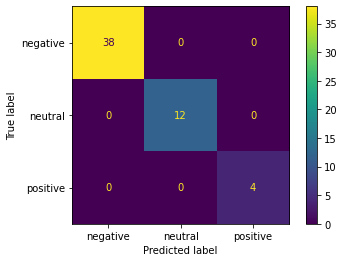

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

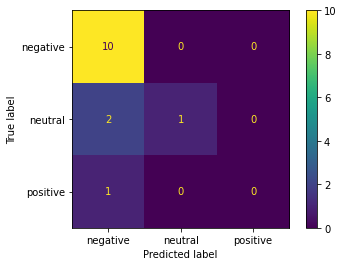

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [ ]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

In [32]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.76923077 1.         0.        ]
Recall: [1.         0.33333333 0.        ]
F1: [0.86956522 0.5        0.        ]


C:\Users\Juan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [33]:
model = RandomForestClassifier()

In [34]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [35]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

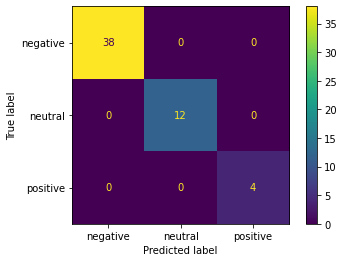

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

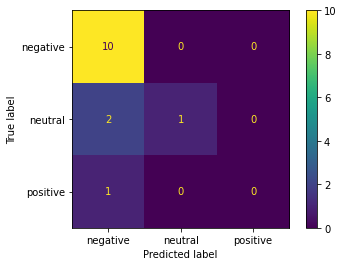

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [ ]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))

In [38]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.76923077 1.         0.        ]
Recall: [1.         0.33333333 0.        ]
F1: [0.86956522 0.5        0.        ]


C:\Users\Juan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analyzing errors

In [ ]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [ ]:
error_df.shape

In [ ]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(100)